## Run this code independatly 

## Extract User Followers and Following

In [ ]:
from tweepy import API, Cursor, OAuthHandler, TweepError
import json
import pandas as pd

consumer_key = 'HMOpnrt95Pcdpsj50J8oADr1U'
consumer_secret = '5L4HLlK0lG9nrhRqrZP3cmnFyeKiW2h9mrvnhQAmYAq7OPyUdi'
access_token = '3410829394-kx7FXWegLDi1nNoHt8ctVll7hdjwPzUpTSW8Kg0'
access_secret = 'rhicCpQjqsCeUeibevbJrEttG42Qa9YqPDq7aGOjHWzrA'

# Authenticate Tweepy connection to Twitter API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

def checkFollow(status,user_screenname):
  for z in user_screenname:
    relations = []
    print("Followers of",z,"UserName")
    for i in status:
      try:
        if z not in i:
          user_relation = api.show_friendship(source_screen_name=z, target_screen_name=i)
          dic = user_relation[0]._json
          dic['following_user_name'] = user_relation[1].screen_name
          relations.append(user_relation[0]._json)
          filename = user_relation[0].screen_name + '.json'
          with open('D:/json/'+filename, 'w') as f:
            json.dump(relations, f)
      except:
        print(i, "User not found")
        continue
  return True

df = pd.read_csv('D:/names.csv')
status = df['name'].unique()

user_screenname = df['name'].unique()

r = checkFollow(status,user_screenname)

## Network Graph

In [ ]:
import networkx as nx
import os
import json
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import glob, os, json

In [ ]:
json_dir = '/content/json'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)
df = pd.concat(dfs)

## Fetch only the Following

In [ ]:
df = df.loc[df['following'] == True]

In [ ]:
X = df[['screen_name','following_user_name']]

## Top 2 User Graph

In [ ]:
test = X.loc[(X['screen_name'] == 'DeppSoldier_22') | (X['screen_name'] == 'TeriCarson')]

In [ ]:
fo = list(test['screen_name'])

In [ ]:
to = list(test['following_user_name'])

## Network Graph

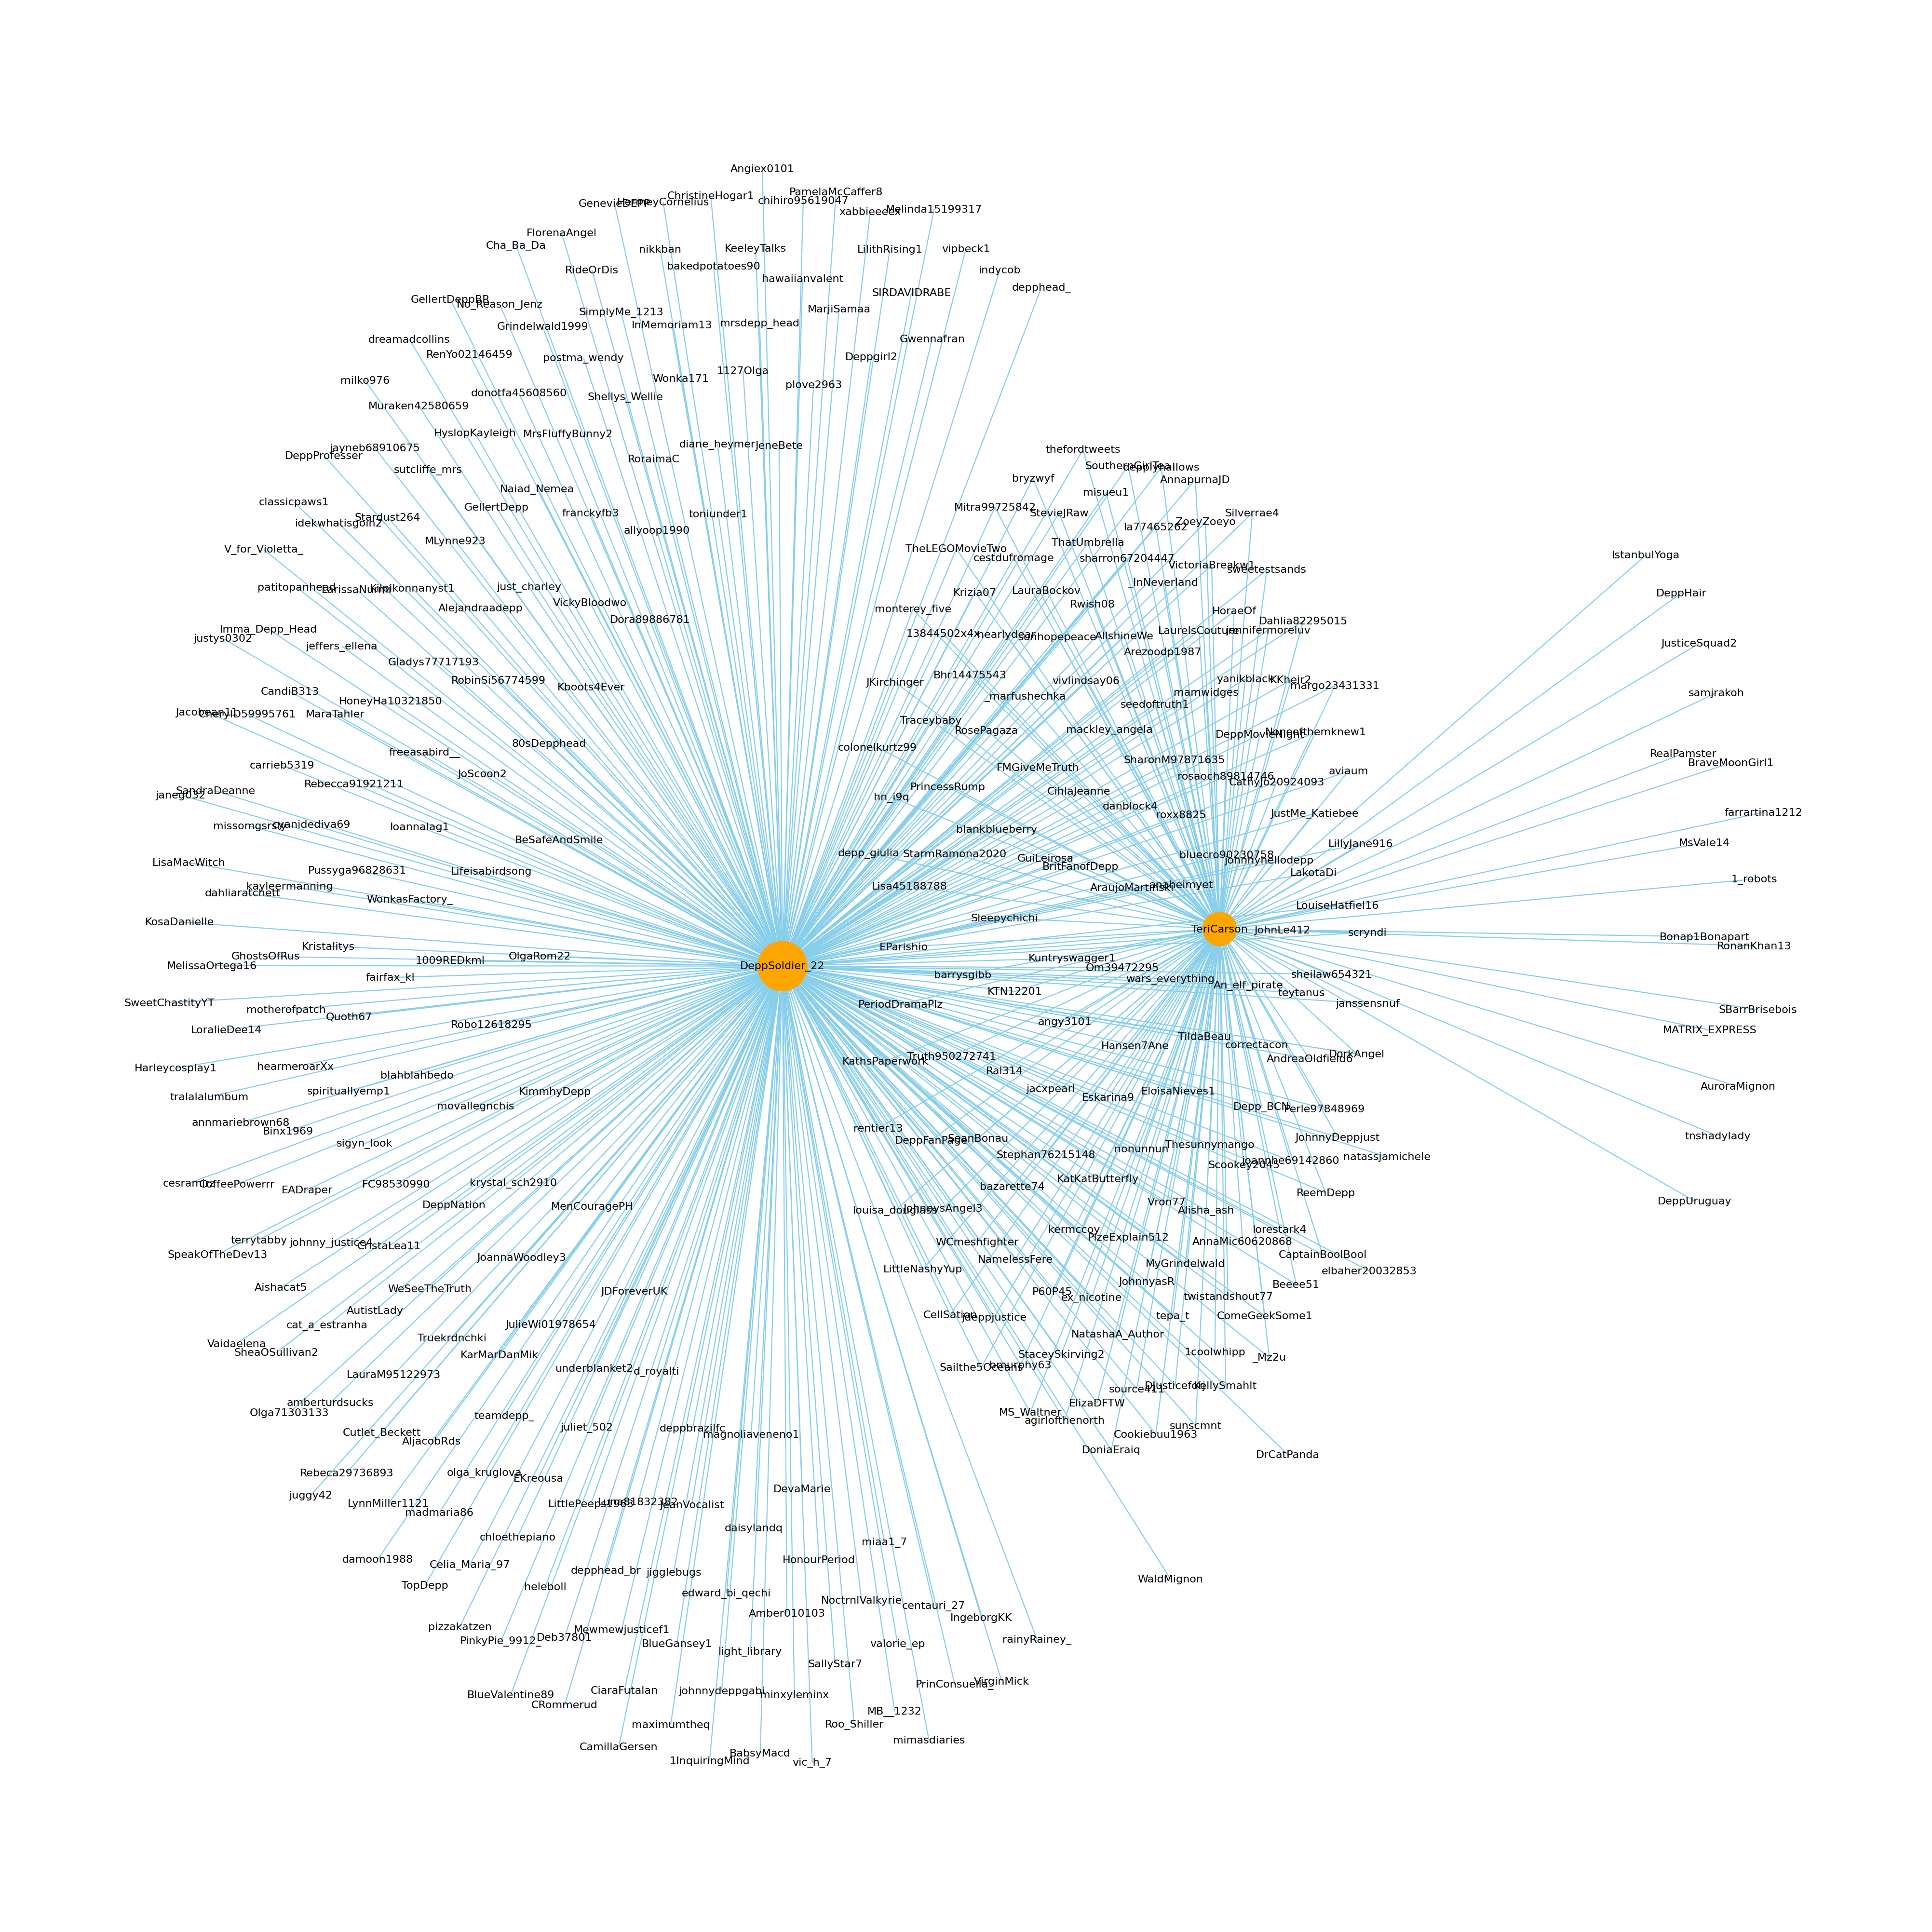

In [ ]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from': fo, 'to':to})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Chart with Custom edges:
fig = plt.figure(1, figsize=(100,100), dpi=40)
nx.draw(G, with_labels=True,nodelist=test['screen_name'].value_counts().index,node_size=test['screen_name'].value_counts().values * 100,node_color=['orange'],width=4,edge_color="skyblue",font_size=40, font_weight='normal')
fig.savefig("Graph.png", format="PNG")